In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)

In [12]:
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [19]:
degree=(AM.sum()-1).astype(int)

In [24]:
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [33]:
degree_dict[481]

Index(['TP53'], dtype='object')

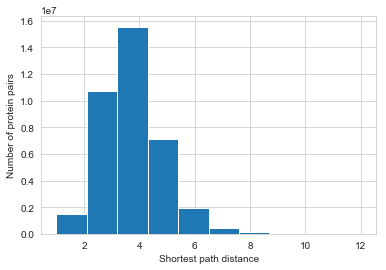

In [3]:
plt.hist(DM.values[np.triu_indices_from(DM,1)])
plt.xlabel('Shortest path distance')
plt.ylabel('Number of protein pairs')

In [38]:
set_name='KEGG'
gene_sets=pd.read_csv('../results/genesets/single/csvs/%s.csv' % set_name,sep=',',header=0,index_col=0)
#overlap with DM
fil=np.in1d(gene_sets['Gene'],DM.index)
gene_sets=gene_sets[fil]
distances=[]
bg=[]
for gene_set in gene_sets['Set'].unique():
    fil=gene_sets['Set']==gene_set
    genes=gene_sets[fil]['Gene'].unique()
    if len(genes)>1:
        distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
        degree_counts=degree[genes].value_counts()
        genes=[]
        for d in degree_counts.index:
            genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
        bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])

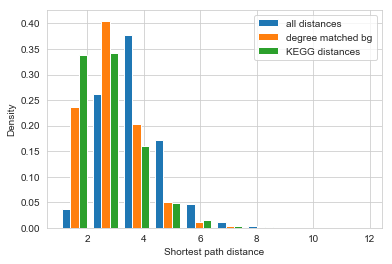

In [39]:
plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
plt.xlabel('Shortest path distance')
plt.ylabel('Density')
plt.legend(['all distances','degree matched bg',set_name+ ' distances'])

In [40]:
DM=pd.read_csv('../data/omnipath/DSD_conv.csv',sep=',',header=0,index_col=0)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


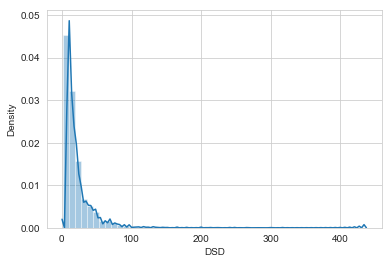

In [19]:
sns.distplot(DM.values[np.triu_indices_from(DM,1)])
plt.xlabel('DSD')
plt.ylabel('Density')

In [58]:
DM2=np.log2(DM)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


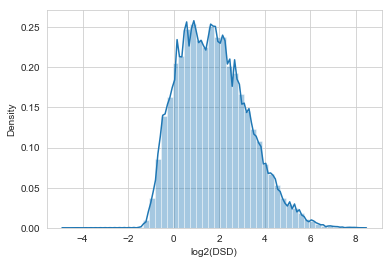

In [59]:
sns.distplot(DM2.values[np.triu_indices_from(DM,1)])
plt.xlabel('log2(DSD)')
plt.ylabel('Density')

In [62]:
set_name='KEGG'
gene_sets=pd.read_csv('../results/genesets/single/csvs/%s.csv' % set_name,sep=',',header=0,index_col=0)
#overlap with DM
fil=np.in1d(gene_sets['Gene'],DM2.index)
gene_sets=gene_sets[fil]
distances=[]
bg=[]
for gene_set in gene_sets['Set'].unique():
    fil=gene_sets['Set']==gene_set
    genes=gene_sets[fil]['Gene'].unique()
    if len(genes)>1:
        distances+=list(DM2.loc[genes,genes].values[np.triu_indices_from(DM2.loc[genes,genes],1)])
        degree_counts=degree[genes].value_counts()
        genes=[]
        for d in degree_counts.index:
            genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
        bg+=list(DM2.loc[genes,genes].values[np.triu_indices_from(DM2.loc[genes,genes],1)])

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


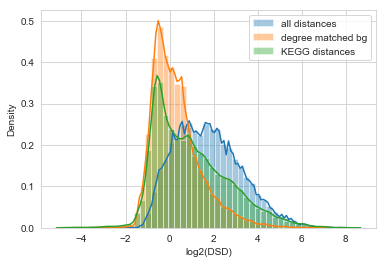

In [63]:
sns.distplot(DM2.values[np.triu_indices_from(DM,1)])
sns.distplot(bg)
sns.distplot(distances)
plt.xlabel('log2(DSD)')
plt.ylabel('Density')
plt.legend(['all distances','degree matched bg',set_name+ ' distances'])

In [28]:
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

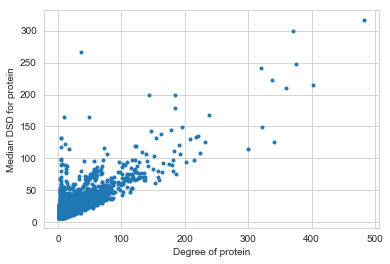

In [32]:
plt.plot(AM.sum(),DM.median(),'.')
plt.xlabel('Degree of protein')
plt.ylabel('Median DSD for protein')

In [166]:
DM=np.log2(DM)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


In [65]:
kegg=pd.read_csv('../results/genesets/single/csvs/dorothea_AB.csv',sep=',',header=0,index_col=0)

In [66]:
fil=np.in1d(kegg['Gene'],DM.index)

In [67]:
kegg=kegg[fil]

In [102]:
gene_set=kegg['Set'].unique()[9]

In [103]:
fil=kegg['Set']==gene_set
genes=kegg[fil]['Gene'].values

In [104]:
np.median(DM.values[np.triu_indices_from(DM.loc[genes,genes],1)])

3.567737652243567

In [101]:
np.median(DM.values[np.triu_indices_from(DM,1)])

3.6598339562094737

In [105]:
def get_distance_distribution(set_name='KEGG'):
    pass

In [230]:
set_name='dorothea_AB'
gene_sets=pd.read_csv('../results/genesets/single/csvs/%s.csv' % set_name,sep=',',header=0,index_col=0)
#overlap with DM
fil=np.in1d(gene_sets['Gene'],DM.index)
gene_sets=gene_sets[fil]
medians_true=[]
medians_random=[]
for gene_set in gene_sets['Set'].unique():
    fil=gene_sets['Set']==gene_set
    genes=gene_sets[fil]['Gene'].unique()
    if len(genes)>1:
        medians_true+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
        genes=np.random.choice(DM.index,len(genes),False)
        medians_random+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])

In [231]:
#sns.distplot(medians_true)
#sns.distplot(medians_random)
print(np.mean(medians_true),np.mean(medians_random))

3.391658341964466 3.977894085273551


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


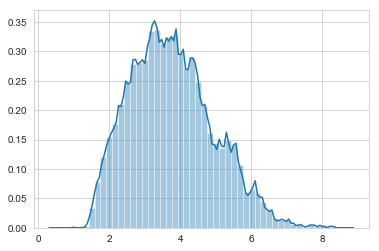

In [177]:
sns.distplot(DM.values[np.triu_indices_from(DM,1)])

In [31]:
DM.loc["EGFR"]

A1CF       212.924649
A2M        207.312266
AAAS       210.235048
AAK1       208.602174
AAMP       210.116972
AANAT      210.535626
AATF       212.745360
AATK       178.411393
ABCA1      219.123065
ABCB1      210.088757
ABCB6      210.149527
ABCC1      210.841829
ABCC2      210.643410
ABCC3      211.457012
ABCC4      210.971093
ABCC8      214.266032
ABCC9      211.303743
ABCD3      215.596269
ABCE1      210.660544
ABCF1      210.128487
ABCF2      210.235048
ABCG2      210.278174
ABHD5      212.425679
ABI1       204.970171
ABI2       208.139101
ABI3       209.325372
ABI3BP     209.793753
ABL1       209.616679
ABL2       205.294071
ABLIM1     210.002218
              ...    
ZNF652     209.297974
ZNF653     210.329097
ZNF655     210.217327
ZNF668     210.217178
ZNF675     210.094783
ZNF692     211.423888
ZNF7       210.431577
ZNF703     210.351370
ZNF74      210.773560
ZNF746     210.468984
ZNF76      210.526571
ZNHIT1     210.221081
ZNHIT3     210.206557
ZNRD1      210.447023
ZNRF1     